In [1]:
%matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))

import datetime as dt

import numpy as np
import numpy.testing as npt
import matplotlib.pyplot as plt

from thalesians.tsa.distrs import NormalDistr as N
import thalesians.tsa.filtering as filtering
import thalesians.tsa.filtering.kalman as kalman
import thalesians.tsa.filtering.particle as particle
import thalesians.tsa.filtering.visual as visual
import thalesians.tsa.numpyutils as npu
import thalesians.tsa.processes as proc
import thalesians.tsa.random as rnd
import thalesians.tsa.simulation as sim

C:\Programs\Win64\Anaconda\V4.4.0_3.6\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
X = proc.GeometricBrownianMotion()
x0 = .3

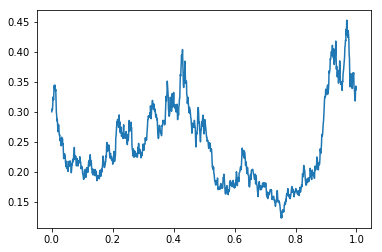

In [4]:
rnd.random_state(np.random.RandomState(seed=42), force=True)
em = sim.EulerMaruyama(process=X, initial_value=x0, times=sim.xtimes(start=0., stop=1., step=1E-3))
df = sim.run(em)
plt.plot(df);

In [5]:
t0 = 0.
kf = filtering.kalman.KalmanFilter(t0, state_distr=N(mean=x0, cov=2.5), process=X, approximate_distr=True)

In [6]:
observable = kf.create_observable(kalman.KalmanFilterObsModel.create(1.), X)

In [7]:
run_df = filtering.run(observable=observable, obss=0, df=df, return_df=True)

In [8]:
run_df.df

,time,filter_name,filter_type,observable_name,accepted,obs_mean,obs_cov,predicted_obs_mean,predicted_obs_cov,cross_cov,innov_mean,innov_cov,prior_state_mean,prior_state_cov,posterior_state_mean,posterior_state_cov,true_value,log_likelihood,gain
0,0.000,KalmanFilter_2277407786600,<class 'thalesians.tsa.filtering.kalman.Kalman...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,2.500000,0.300000,2.500000,None,NaN,None
1,0.000,KalmanFilter_2277407786600,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2277407787608,True,0.300000,0.0,0.300000,2.500000,2.500000,0.000000,2.500000,0.300000,2.500000,0.300000,2.500000,None,-1.377084,[[1.0]]
2,0.001,KalmanFilter_2277407786600,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2277407787608,True,0.304712,0.0,0.300000,0.000090,0.000090,0.004712,0.000090,0.300000,0.000090,0.300000,0.000090,None,3.615361,[[1.0]]
3,0.002,KalmanFilter_2277407786600,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2277407787608,True,0.303380,0.0,0.304712,0.000093,0.000093,-0.001332,0.000093,0.304712,0.000093,0.304712,0.000093,None,3.713523,[[1.0]]
4,0.003,KalmanFilter_2277407786600,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2277407787608,True,0.309594,0.0,0.303380,0.000092,0.000092,0.006214,0.000092,0.303380,0.000092,0.303380,0.000092,None,3.517813,[[1.0]]
5,0.004,KalmanFilter_2277407786600,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2277407787608,True,0.324504,0.0,0.309594,0.000096,0.000096,0.014911,0.000096,0.309594,0.000096,0.309594,0.000096,None,2.547953,[[1.0]]
6,0.005,KalmanFilter_2277407786600,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2277407787608,True,0.322102,0.0,0.324504,0.000105,0.000105,-0.002403,0.000105,0.324504,0.000105,0.324504,0.000105,None,3.632745,[[1.0]]
7,0.006,KalmanFilter_2277407786600,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2277407787608,True,0.319717,0.0,0.322102,0.000104,0.000104,-0.002385,0.000104,0.322102,0.000104,0.322102,0.000104,None,3.640181,[[1.0]]
8,0.007,KalmanFilter_2277407786600,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2277407787608,True,0.335683,0.0,0.319717,0.000102,0.000102,0.015966,0.000102,0.319717,0.000102,0.319717,0.000102,None,2.428676,[[1.0]]
9,0.008,KalmanFilter_2277407786600,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2277407787608,True,0.343830,0.0,0.335683,0.000113,0.000113,0.008146,0.000113,0.335683,0.000113,0.335683,0.000113,None,3.331946,[[1.0]]


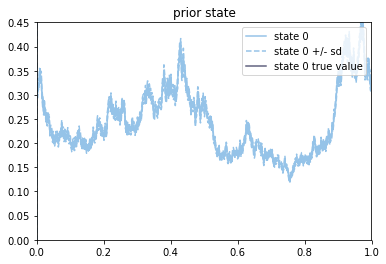

In [9]:
sp = visual.StatePlot(plot_obs_results=False)
sp.process_run_df(run_df.df)
sp.ax.set_ylim((0., .45));

In [10]:
pf = filtering.particle.ParticleFilter(t0, state_distr=N(mean=x0, cov=2.5), process=X)

In [11]:
observable = pf.create_observable(particle.ParticleFilterObsModel.create(1.), X)

In [12]:
pf.predict(0.0001)

In [13]:
pf.mean

array([ 0.41408505])

In [14]:
pf.var

array([ 2.48376226])

In [15]:
pf.time

0.0001